## Preparing Dataset

In [8]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define our example directories and files
base_dir = 'Rice Leaf Dataset'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [12]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2) #included in our dependencies

train_generator=train_datagen.flow_from_directory(train_dir,
                                                 target_size=(300,300),
                                                 batch_size=64,
                                                 class_mode='categorical',
                                                 shuffle=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                 target_size=(300,300),
                                                 batch_size=64,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 5338 images belonging to 4 classes.
Found 296 images belonging to 4 classes.


## Setup Pre-Trained Resnet50

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adagrad, Adam



In [10]:
pretrained_model=tf.keras.applications.ResNet50(
    include_top=False,
    pooling='avg', classes=4,
    weights= 'imagenet',
    input_shape=(300,300,3))

for layer in pretrained_model.layers :
    layer.trainable = False

pretrained_model.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 306, 306, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 150, 150, 64) 256         conv1_conv[0][0]                 
__________________________

In [11]:
resnet_model = Sequential()
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dropout(0.3))
resnet_model.add(Dense(4, activation='softmax')
) 

In [13]:
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])


In [15]:
history = resnet_model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs=150,
                    batch_size=64)

Epoch 1/150
84/84 [==============================] - 126s 1s/step - loss: 1.3161 - accuracy: 0.3953 - val_loss: 1.2801 - val_accuracy: 0.3480
Epoch 2/150
84/84 [==============================] - 110s 1s/step - loss: 1.2727 - accuracy: 0.4253 - val_loss: 1.2032 - val_accuracy: 0.5405
Epoch 3/150
84/84 [==============================] - 110s 1s/step - loss: 1.2306 - accuracy: 0.4562 - val_loss: 1.1661 - val_accuracy: 0.5000
Epoch 4/150
84/84 [==============================] - 111s 1s/step - loss: 1.2065 - accuracy: 0.4781 - val_loss: 1.1638 - val_accuracy: 0.5676
Epoch 5/150
84/84 [==============================] - 110s 1s/step - loss: 1.1812 - accuracy: 0.4818 - val_loss: 1.1216 - val_accuracy: 0.5743
Epoch 6/150
84/84 [==============================] - 110s 1s/step - loss: 1.1651 - accuracy: 0.4994 - val_loss: 1.1089 - val_accuracy: 0.5169
Epoch 7/150
84/84 [==============================] - 111s 1s/step - loss: 1.1583 - accuracy: 0.4949 - val_loss: 1.1095 - val_accuracy: 0.5338
Epoch 

# Model Evaluation

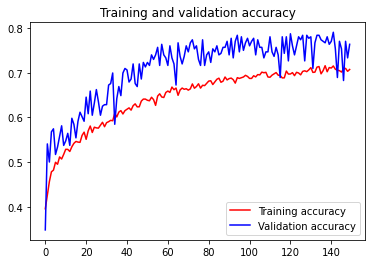

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

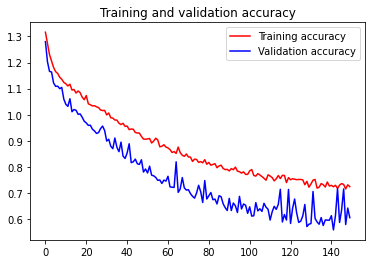

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(epochs, loss, 'r', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

# Save Model

In [18]:
! pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
# serialize weights to HDF5
from tensorflow import keras
from tensorflow.contrib import lite

keras.model.save_model(resnet_model, "model_weight.h5")